In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re as re

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

import warnings
warnings.filterwarnings('ignore')

In [2]:
# loading the dataset
train = pd.read_csv('train.csv', index_col='PassengerId')
test = pd.read_csv('test.csv', index_col='PassengerId')

In [3]:
train.shape, test.shape

((891, 11), (418, 10))

In [4]:
Y = train['Survived']
train = train.drop('Survived', axis=1)
train['Training_set'] = True
test['Training_set'] = False
df_comb = pd.concat([train, test])
df_comb.isnull().sum()

Pclass             0
Name               0
Sex                0
Age              263
SibSp              0
Parch              0
Ticket             0
Fare               1
Cabin           1014
Embarked           2
Training_set       0
dtype: int64

In [5]:
# Feature Engineering
##1. Family Size as combination of SibSb + Parch - from Sina
df_comb['FamilySize'] = df_comb['SibSp'] + df_comb['Parch'] + 1

In [6]:
# check if columns have duplicate ticket number. Duplicate ticket numbers symbolize family/friends
tks = df_comb['Ticket']
dataset_dup = df_comb[tks.isin(tks[tks.duplicated()])]
df_comb['TkDup'] = df_comb.Ticket.isin(dataset_dup['Ticket'])

In [7]:
df_comb.head(5)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Training_set,FamilySize,TkDup
PassengerId,,,,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,True,2,False
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,True,2,True
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,True,1,False
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,True,2,True
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,True,1,False


In [8]:
df_comb[df_comb['Ticket'] == '113803']

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Training_set,FamilySize,TkDup
PassengerId,,,,,,,,,,,,,
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1,C123,S,True,2,True
138,1,"Futrelle, Mr. Jacques Heath",male,37.0,1,0,113803,53.1,C123,S,True,2,True


In [9]:
# 2. IsAlone using FamilySize and DupTicket
df_comb['IsAlone'] = 0
dataset_filter = (df_comb['FamilySize'] == 1) & (df_comb['TkDup'] == False)
df_comb['IsAlone'] = np.where(dataset_filter, 1, 0)

In [10]:
df_comb.head(5)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Training_set,FamilySize,TkDup,IsAlone
PassengerId,,,,,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,True,2,False,0
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,True,2,True,0
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,True,1,False,1
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,True,2,True,0
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,True,1,False,1


In [11]:
# 3. Cabin
df_comb.loc[df_comb.Cabin.notnull() & df_comb.Cabin.str.contains('F'), 'Cabin']

PassengerId
67        F33
76      F G73
129     F E69
149        F2
184        F4
194        F2
341        F2
346       F33
517       F33
619        F4
700     F G63
716     F G73
777       F38
949     F G63
1001        F
1070       F4
1114      F33
1180    F E46
1213    F E57
1214       F2
1218       F4
Name: Cabin, dtype: object

In [12]:
deck_list = list(map(lambda x: x[0], df_comb.Cabin.dropna().tolist()))
print(deck_list)

['C', 'C', 'E', 'G', 'C', 'D', 'A', 'C', 'B', 'D', 'B', 'C', 'B', 'C', 'F', 'F', 'C', 'E', 'A', 'D', 'D', 'C', 'B', 'E', 'D', 'F', 'D', 'C', 'B', 'F', 'C', 'E', 'B', 'A', 'C', 'F', 'A', 'F', 'B', 'B', 'G', 'A', 'D', 'D', 'C', 'C', 'C', 'D', 'G', 'C', 'B', 'E', 'B', 'C', 'C', 'C', 'D', 'A', 'B', 'D', 'C', 'C', 'B', 'E', 'C', 'C', 'E', 'C', 'B', 'C', 'E', 'C', 'D', 'B', 'C', 'C', 'C', 'E', 'T', 'F', 'C', 'F', 'C', 'E', 'D', 'B', 'E', 'C', 'B', 'D', 'G', 'C', 'E', 'C', 'E', 'B', 'C', 'A', 'C', 'C', 'C', 'E', 'D', 'E', 'E', 'D', 'A', 'B', 'C', 'B', 'C', 'D', 'C', 'B', 'C', 'E', 'D', 'F', 'B', 'B', 'C', 'B', 'B', 'B', 'C', 'C', 'A', 'E', 'C', 'E', 'E', 'C', 'A', 'E', 'B', 'D', 'A', 'C', 'F', 'D', 'D', 'D', 'A', 'B', 'B', 'D', 'A', 'D', 'E', 'C', 'B', 'B', 'D', 'B', 'B', 'C', 'F', 'C', 'E', 'E', 'C', 'C', 'C', 'F', 'C', 'E', 'E', 'B', 'B', 'D', 'C', 'B', 'B', 'D', 'E', 'B', 'B', 'D', 'E', 'F', 'B', 'B', 'D', 'B', 'D', 'B', 'A', 'E', 'B', 'B', 'E', 'B', 'E', 'C', 'C', 'D', 'E', 'D', 'A', 'D',

In [13]:
# Deck as the initial of the Cabin. If no cabin, use 'X'
crit = df_comb['Cabin'].isnull()
df_comb['Deck'] = df_comb['Cabin'].astype(str).str[0].where(~crit, other='X')
df_comb.head()
df_comb.drop('Cabin', axis=1, inplace=True)

In [14]:
# some passengers booked more than a single cabin
df_comb.loc[[28, 76, 89, 129]]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Training_set,FamilySize,TkDup,IsAlone,Deck
PassengerId,,,,,,,,,,,,,,
28,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,S,True,6,True,0,C
76,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,S,True,1,False,1,F
89,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,S,True,6,True,0,C
129,3,"Peter, Miss. Anna",female,NaN,1,1,2668,22.3583,C,True,3,True,0,F


In [15]:
df_comb.head(3)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Training_set,FamilySize,TkDup,IsAlone,Deck
PassengerId,,,,,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,True,2,False,0,X
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,True,2,True,0,C
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,True,1,False,1,X


In [16]:
# 4. Title derived from Name
def get_title(name):
    title_search = re.search(' ([A-Za-z]+)\.', name) # regex starting with space ending with .
    # If the title exists, extract and return it.
    if title_search:
        return title_search.group(1)
    return ""

df_comb['Title'] = df_comb['Name'].apply(get_title)

print(pd.crosstab(df_comb['Title'], df_comb['Sex']))

Sex       female  male
Title                 
Capt           0     1
Col            0     4
Countess       1     0
Don            0     1
Dona           1     0
Dr             1     7
Jonkheer       0     1
Lady           1     0
Major          0     2
Master         0    61
Miss         260     0
Mlle           2     0
Mme            1     0
Mr             0   757
Mrs          197     0
Ms             2     0
Rev            0     8
Sir            0     1


In [17]:
df_comb['Title'] = df_comb['Title'].replace(['Mlle','Ms', 'Countess', 'Lady', 'Dona'], 'Miss')
df_comb['Title'] = df_comb['Title'].replace('Mme', 'Mrs')
df_comb['Title'] = df_comb['Title'].replace(['Capt','Col', 'Don', 'Major', 'Rev', 'Sir', 'Jonkheer'], 'Mr')
print(pd.crosstab(df_comb['Title'], df_comb['Sex']))

Sex     female  male
Title               
Dr           1     7
Master       0    61
Miss       267     0
Mr           0   775
Mrs        198     0


In [18]:
# 5., 6. setting age and fare to median value in its class
df_comb.loc[df_comb.Age.isnull(), 'Age'] = df_comb.groupby(['Title', 'Pclass']).Age.transform('mean')
df_comb.loc[df_comb.Fare.isnull(), 'Fare'] = df_comb.groupby(['Title', 'Pclass']).Fare.transform('mean')

In [19]:
#7. Embarked
df_comb[df_comb.Embarked.isnull()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Training_set,FamilySize,TkDup,IsAlone,Deck,Title
PassengerId,,,,,,,,,,,,,,,
62,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN,True,1,True,0,B,Miss
830,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN,True,1,True,0,B,Mrs


In [20]:
df_comb[df_comb['Fare'].between(75, 85) & (df_comb.Pclass==1) & (df_comb.Sex=='female') & (df_comb.Deck.str.startswith('B'))]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Training_set,FamilySize,TkDup,IsAlone,Deck,Title
PassengerId,,,,,,,,,,,,,,,
62,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0000,NaN,True,1,True,0,B,Miss
830,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0000,NaN,True,1,True,0,B,Mrs
904,1,"Snyder, Mrs. John Pillsbury (Nelle Stevenson)",female,23.0,1,0,21228,82.2667,S,False,2,True,0,B,Mrs
1289,1,"Frolicher-Stehli, Mrs. Maxmillian (Margaretha ...",female,48.0,1,1,13567,79.2000,C,False,3,True,0,B,Mrs


In [21]:
# cannot identify which Embark, so marking to mode
df_comb['Embarked']= df_comb['Embarked'].fillna(value=df_comb['Embarked'].value_counts().index[0])
df_comb.loc[[62, 830]]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Training_set,FamilySize,TkDup,IsAlone,Deck,Title
PassengerId,,,,,,,,,,,,,,,
62,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,S,True,1,True,0,B,Miss
830,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,S,True,1,True,0,B,Mrs


In [22]:
#8. Time travelled S(11), C(5), Q(4) in Days before hitting iceberg (15th April 1912) 
# calculated based on embarkment port route of  S(11), C(5), Q(4) using info 
# from https://discovernorthernireland.com/things-to-do/attractions/titanic/titanic-sailing-route-map/

df_comb['TimeTravelled'] = 11 # default for S
dataset_filter = (df_comb['Embarked'] == 'C')
dataset_filter_1 = (df_comb['Embarked'] == 'Q')
df_comb['TimeTravelled'] = np.where(dataset_filter, 5, df_comb['TimeTravelled'].values)
df_comb['TimeTravelled'] = np.where(dataset_filter_1, 4, df_comb['TimeTravelled'].values)

In [23]:
df_comb.head(3)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Training_set,FamilySize,TkDup,IsAlone,Deck,Title,TimeTravelled
PassengerId,,,,,,,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,True,2,False,0,X,Mr,11
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,True,2,True,0,C,Mrs,5
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,True,1,False,1,X,Miss,11


In [24]:
df_comb.drop(["Name", "TkDup", "Ticket"], axis=1, inplace=True)

In [25]:
df_comb.head(3)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Training_set,FamilySize,IsAlone,Deck,Title,TimeTravelled
PassengerId,,,,,,,,,,,,,
1,3,male,22.0,1,0,7.2500,S,True,2,0,X,Mr,11
2,1,female,38.0,1,0,71.2833,C,True,2,0,C,Mrs,5
3,3,female,26.0,0,0,7.9250,S,True,1,1,X,Miss,11


In [26]:
#oneHotEncoding Sex, Embarked, Title,Deck
df_comb = df_comb.join(pd.get_dummies(df_comb[['Sex', 'Embarked','Title', 'Deck']]))

In [27]:
df_comb.drop(['Sex','Embarked','Title', 'Deck'], axis=1, inplace=True)
df_comb.head(3)

,Pclass,Age,SibSp,Parch,Fare,Training_set,FamilySize,IsAlone,TimeTravelled,Sex_female,...,Title_Mrs,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Deck_X
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,3,22.0,1,0,7.2500,True,2,0,11,0,...,0,0,0,0,0,0,0,0,0,1
2,1,38.0,1,0,71.2833,True,2,0,5,1,...,1,0,0,1,0,0,0,0,0,0
3,3,26.0,0,0,7.9250,True,1,1,11,1,...,0,0,0,0,0,0,0,0,0,1


In [28]:
df_comb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 28 columns):
Pclass           1309 non-null int64
Age              1309 non-null float64
SibSp            1309 non-null int64
Parch            1309 non-null int64
Fare             1309 non-null float64
Training_set     1309 non-null bool
FamilySize       1309 non-null int64
IsAlone          1309 non-null int32
TimeTravelled    1309 non-null int64
Sex_female       1309 non-null uint8
Sex_male         1309 non-null uint8
Embarked_C       1309 non-null uint8
Embarked_Q       1309 non-null uint8
Embarked_S       1309 non-null uint8
Title_Dr         1309 non-null uint8
Title_Master     1309 non-null uint8
Title_Miss       1309 non-null uint8
Title_Mr         1309 non-null uint8
Title_Mrs        1309 non-null uint8
Deck_A           1309 non-null uint8
Deck_B           1309 non-null uint8
Deck_C           1309 non-null uint8
Deck_D           1309 non-null uint8
Deck_E           1309 non-null uint8
De

In [29]:
# solving dummy variable drop by dropping one categorical value in each encong
df_comb.drop(['Sex_female','Embarked_C','Title_Dr', 'Deck_X'], axis=1, inplace=True)

In [30]:
df_comb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 24 columns):
Pclass           1309 non-null int64
Age              1309 non-null float64
SibSp            1309 non-null int64
Parch            1309 non-null int64
Fare             1309 non-null float64
Training_set     1309 non-null bool
FamilySize       1309 non-null int64
IsAlone          1309 non-null int32
TimeTravelled    1309 non-null int64
Sex_male         1309 non-null uint8
Embarked_Q       1309 non-null uint8
Embarked_S       1309 non-null uint8
Title_Master     1309 non-null uint8
Title_Miss       1309 non-null uint8
Title_Mr         1309 non-null uint8
Title_Mrs        1309 non-null uint8
Deck_A           1309 non-null uint8
Deck_B           1309 non-null uint8
Deck_C           1309 non-null uint8
Deck_D           1309 non-null uint8
Deck_E           1309 non-null uint8
Deck_F           1309 non-null uint8
Deck_G           1309 non-null uint8
Deck_T           1309 non-null uint8
dt

In [31]:
df_comb.head()

,Pclass,Age,SibSp,Parch,Fare,Training_set,FamilySize,IsAlone,TimeTravelled,Sex_male,...,Title_Mr,Title_Mrs,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,3,22.0,1,0,7.2500,True,2,0,11,1,...,1,0,0,0,0,0,0,0,0,0
2,1,38.0,1,0,71.2833,True,2,0,5,0,...,0,1,0,0,1,0,0,0,0,0
3,3,26.0,0,0,7.9250,True,1,1,11,0,...,0,0,0,0,0,0,0,0,0,0
4,1,35.0,1,0,53.1000,True,2,0,11,0,...,0,1,0,0,1,0,0,0,0,0
5,3,35.0,0,0,8.0500,True,1,1,11,1,...,1,0,0,0,0,0,0,0,0,0


In [32]:
train = df_comb[df_comb['Training_set'] == True]
train.drop('Training_set', axis=1, inplace=True)
test = df_comb[df_comb['Training_set'] == False]
test.drop('Training_set', axis=1, inplace=True)
train.shape, test.shape

((891, 23), (418, 23))

In [33]:
train.head()

,Pclass,Age,SibSp,Parch,Fare,FamilySize,IsAlone,TimeTravelled,Sex_male,Embarked_Q,...,Title_Mr,Title_Mrs,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,3,22.0,1,0,7.2500,2,0,11,1,0,...,1,0,0,0,0,0,0,0,0,0
2,1,38.0,1,0,71.2833,2,0,5,0,0,...,0,1,0,0,1,0,0,0,0,0
3,3,26.0,0,0,7.9250,1,1,11,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,35.0,1,0,53.1000,2,0,11,0,0,...,0,1,0,0,1,0,0,0,0,0
5,3,35.0,0,0,8.0500,1,1,11,1,0,...,1,0,0,0,0,0,0,0,0,0


In [34]:
train_surv = pd.concat([train, Y], axis =1)

In [35]:
train_surv.head()

,Pclass,Age,SibSp,Parch,Fare,FamilySize,IsAlone,TimeTravelled,Sex_male,Embarked_Q,...,Title_Mrs,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Survived
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,3,22.0,1,0,7.2500,2,0,11,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1,38.0,1,0,71.2833,2,0,5,0,0,...,1,0,0,1,0,0,0,0,0,1
3,3,26.0,0,0,7.9250,1,1,11,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1,35.0,1,0,53.1000,2,0,11,0,0,...,1,0,0,1,0,0,0,0,0,1
5,3,35.0,0,0,8.0500,1,1,11,1,0,...,0,0,0,0,0,0,0,0,0,0


**Pearson Correlation Heatmap**

let us generate some correlation plots of the features to see how related one feature is to the next. To do so, we will utilise the Seaborn plotting package which allows us to plot heatmaps very conveniently as follows

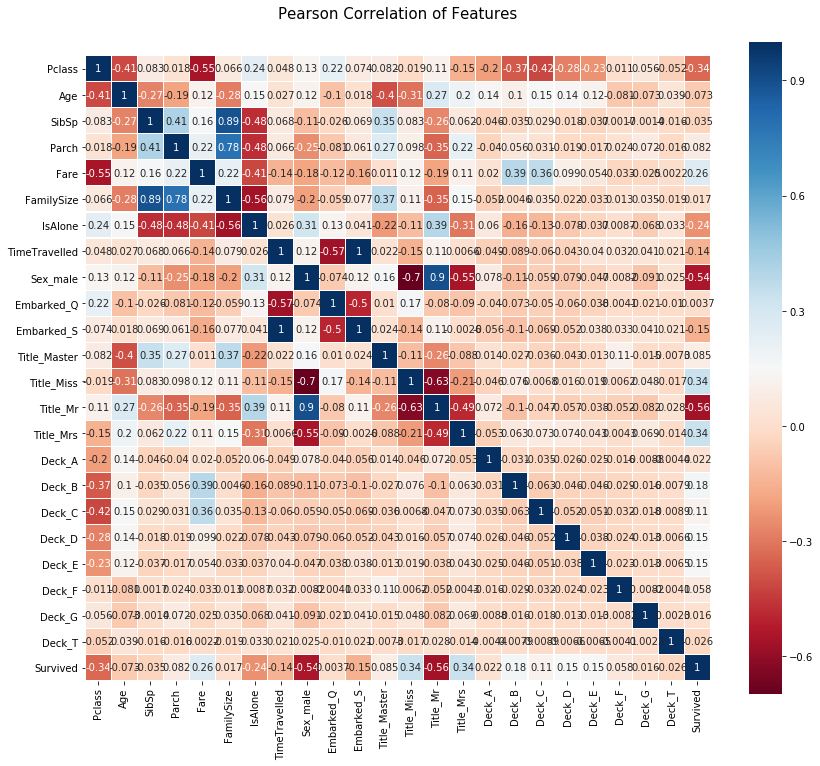

In [36]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(train_surv.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

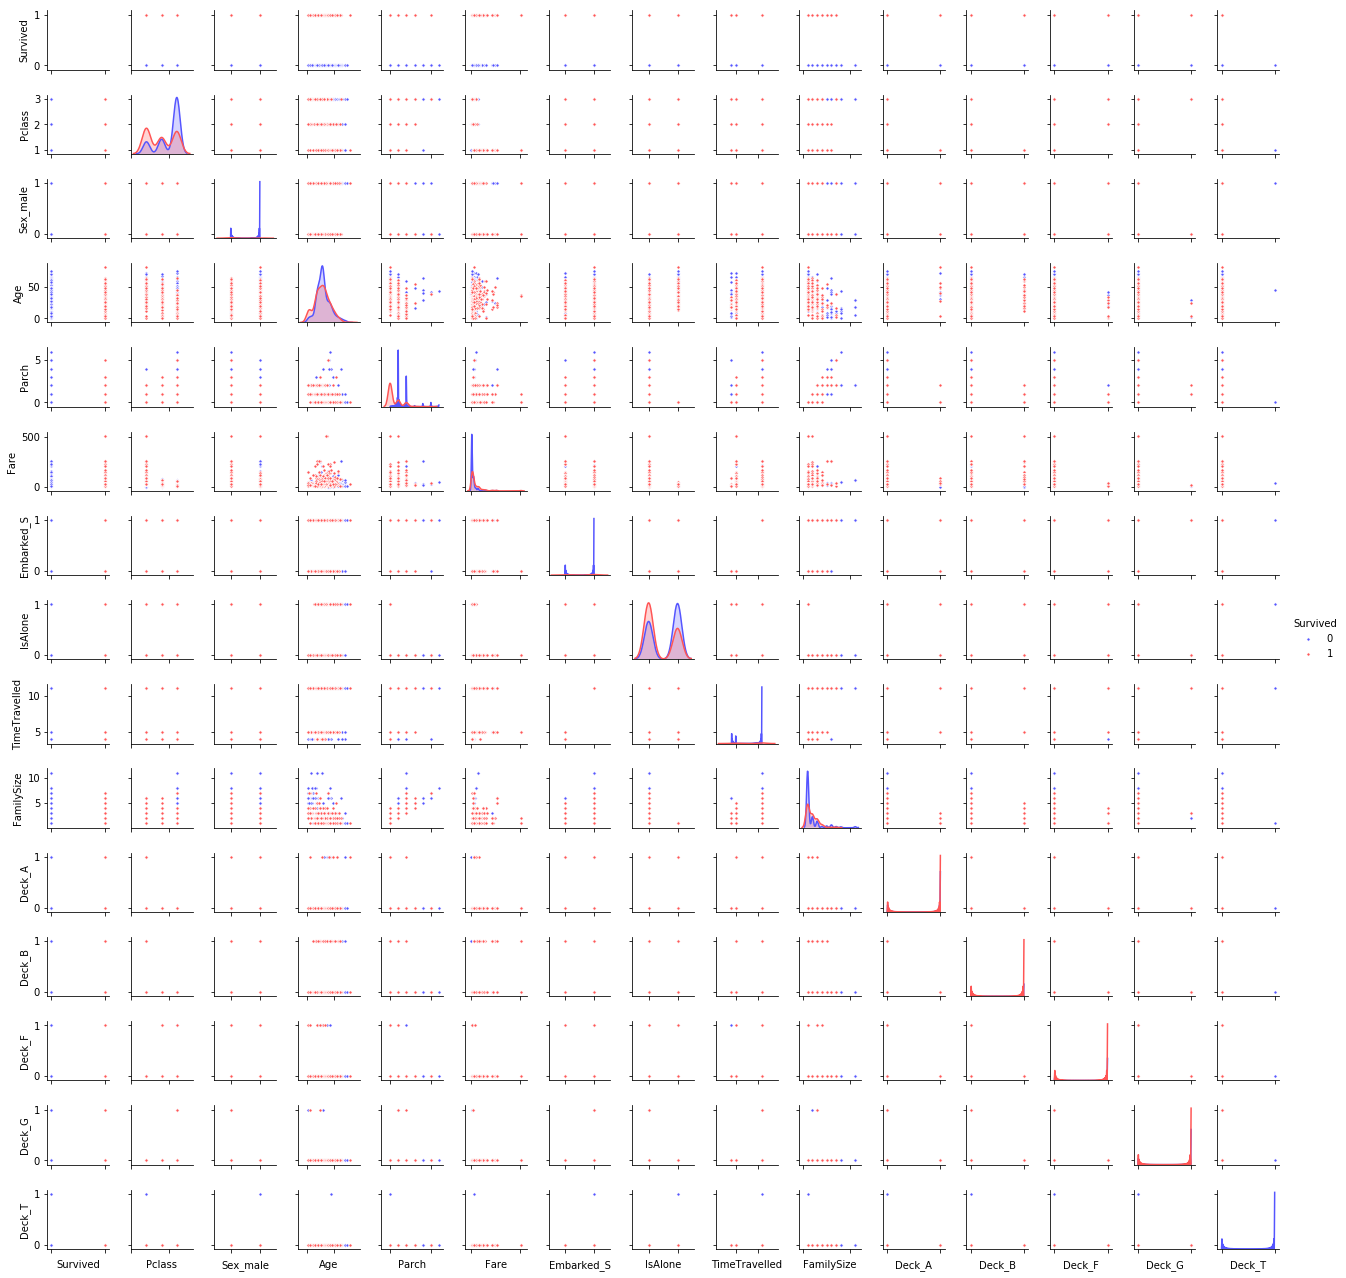

In [37]:
g = sns.pairplot(train_surv[[u'Survived', u'Pclass', u'Sex_male', u'Age', u'Parch', u'Fare', u'Embarked_S', u'IsAlone', u'TimeTravelled',
       u'FamilySize', u'Deck_A', u'Deck_B', u'Deck_F', u'Deck_G', u'Deck_T']], hue='Survived', palette = 'seismic',size=1.2,diag_kind = 'kde',diag_kws=dict(shade=True),plot_kws=dict(s=10) )
g.set(xticklabels=[])

# Automated Backward Feature Elimindation to reduce coorelated featured
Another option to reduce the number of features is Backward Feature Elimination (BFE). The idea is very similar to greedy elimination, however, here features are eliminated with respect to their importance. There are many possiblities to evalute the importance of features. In this kernel I do logistic regression and calculate the features’ p-value. The lower the p-value the more relevant the feature. Thus, features with the highest p-value get eliminated first until the selected number of features is reached. 

In [38]:
train_bfe = train.copy() # duplicating
test_bfe = test.copy() # duplicating

In [39]:
train_bfe.insert(0,'Bias',1) # adding bias for statsmodel
test_bfe.insert(0,'Bias',1)

In [40]:
train_bfe.head(5)

,Bias,Pclass,Age,SibSp,Parch,Fare,FamilySize,IsAlone,TimeTravelled,Sex_male,...,Title_Mr,Title_Mrs,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,1,3,22.0,1,0,7.2500,2,0,11,1,...,1,0,0,0,0,0,0,0,0,0
2,1,1,38.0,1,0,71.2833,2,0,5,0,...,0,1,0,0,1,0,0,0,0,0
3,1,3,26.0,0,0,7.9250,1,1,11,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,35.0,1,0,53.1000,2,0,11,0,...,0,1,0,0,1,0,0,0,0,0
5,1,3,35.0,0,0,8.0500,1,1,11,1,...,1,0,0,0,0,0,0,0,0,0


In [41]:
import statsmodels.formula.api as sm
# new regressor from sm
regressor_OLS = sm.OLS(endog=Y, exog=train_bfe).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Survived   R-squared:                       0.455
Model:                            OLS   Adj. R-squared:                  0.442
Method:                 Least Squares   F-statistic:                     34.58
Date:                Wed, 12 Sep 2018   Prob (F-statistic):           1.60e-99
Time:                        12:40:23   Log-Likelihood:                -351.37
No. Observations:                 891   AIC:                             746.7
Df Residuals:                     869   BIC:                             852.2
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Bias              0.6632      0.193      3.430      0.001       0.284       1.043
Pclass           -0.1250      0.026     -4.788      0.000      -0.176      -0.074
Age              -0.0044      0.001     -3.608      0.000      -0.007      -0.002
SibSp            -0.2513      0.066     -3.830      0.000      -0.380      -0.123
Parch            -0.2319      0.066     -3.513      0.000      -0.361      -0.102
Fare              0.0005      0.000      1.520      0.129      -0.000       0.001
FamilySize        0.1800      0.065      2.783      0.006       0.053       0.307
IsAlone          -0.0158      0.034     -0.462      0.644      -0.083       0.051
TimeTravelled     0.0789      0.025      3.138      0.002       0.030       0.128
Sex_male         -0.5076      0.399     -1.272      0.204      -1.291       0.276
Embarked_Q        0.0605      0.060      1.013      0.311      -0.057       0.178
Embarked_S       -0.5294      0.154     -3.449      0.001      -0.831      -0.228
Title_Master      0.4357      0.167      2.612      0.009       0.108       0.763
Title_Miss       -0.0797      0.371     -0.215      0.830      -0.808       0.649
Title_Mr         -0.0782      0.151     -0.516      0.606      -0.375       0.219
Title_Mrs         0.0436      0.371      0.117      0.906      -0.685       0.772
Deck_A            0.1045      0.104      1.008      0.314      -0.099       0.308
Deck_B            0.0704      0.069      1.018      0.309      -0.065       0.206
Deck_C            0.0157      0.064      0.247      0.805      -0.109       0.141
Deck_D            0.1618      0.075      2.168      0.030       0.015       0.308
Deck_E            0.2153      0.073      2.966      0.003       0.073       0.358
Deck_F            0.1329      0.103      1.292      0.197      -0.069       0.335
Deck_G           -0.1306      0.185     -0.707      0.480      -0.493       0.232
Deck_T           -0.2751      0.366     -0.751      0.453      -0.994       0.444
==============================================================================
Omnibus:                       47.663   Durbin-Watson:                   1.952
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               54.469
Skew:                           0.565   Prob(JB):                     1.49e-12
Kurtosis:                       3.435   Cond. No.                     2.07e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.15e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [42]:
# automated backward elimination with Adjusted R Square
import statsmodels.formula.api as sm
def backwardElimination(X, Y, SL):
    x = X.values
    y = Y.values
    index_r = np.arange(X.shape[1])
    index_r = np.reshape(index_r, (1,index_r.shape[0]))
    index_d = index_r
    print(index_r)
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(y, x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        adjR_before = regressor_OLS.rsquared_adj.astype(float)
        if maxVar > SL:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    temp = x
                    x = np.delete(x, j, 1)
                    index_r_temp = index_r
                    index_r = np.delete(index_r, j, 1)
                    print(index_r)
                    tmp_regressor = sm.OLS(y, x).fit()
                    adjR_after = tmp_regressor.rsquared_adj.astype(float)
                    if (adjR_before >= adjR_after):
                        x_rollback = temp
                        index_rollback = index_r_temp
                        print (regressor_OLS.summary())
                        deleted = np.append(np.setdiff1d(index_d, index_rollback),0)
                        return x_rollback, deleted
                    else:
                        continue
    regressor_OLS.summary()
    return x
SL = 0.05
X_Modeled, index_deleted = backwardElimination(train_bfe, Y, SL)
print(index_deleted)

[[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]]
[[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 16 17 18 19 20 21 22 23]]
[[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 16 17 19 20 21 22 23]]
[[ 0  1  2  3  4  5  6  8  9 10 11 12 13 14 16 17 19 20 21 22 23]]
[[ 0  1  2  3  4  5  6  8  9 10 11 12 13 16 17 19 20 21 22 23]]
[[ 0  1  2  3  4  5  6  8  9 10 11 12 13 16 17 19 20 21 23]]
[[ 0  1  2  3  4  5  6  8  9 10 11 12 13 16 17 19 20 21]]
[[ 0  1  2  3  4  5  6  8  9 10 11 12 13 17 19 20 21]]
[[ 0  1  2  3  4  5  6  8  9 10 11 12 13 19 20 21]]
[[ 0  1  2  3  4  5  6  8  9 11 12 13 19 20 21]]
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.453
Model:                            OLS   Adj. R-squared:                  0.445
Method:                 Least Squares   F-statistic:                     55.90
Date:                Wed, 12 Sep 2018   Prob (F-statistic):

In [43]:
train.head(2)

,Pclass,Age,SibSp,Parch,Fare,FamilySize,IsAlone,TimeTravelled,Sex_male,Embarked_Q,...,Title_Mr,Title_Mrs,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,3,22.0,1,0,7.2500,2,0,11,1,0,...,1,0,0,0,0,0,0,0,0,0
2,1,38.0,1,0,71.2833,2,0,5,0,0,...,0,1,0,0,1,0,0,0,0,0


In [44]:
train_bfe.drop(columns=train_bfe.columns[index_deleted]).head(3)

,Pclass,Age,SibSp,Parch,Fare,FamilySize,TimeTravelled,Sex_male,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Deck_D,Deck_E,Deck_F
PassengerId,,,,,,,,,,,,,,,
1,3,22.0,1,0,7.2500,2,11,1,0,1,0,0,0,0,0
2,1,38.0,1,0,71.2833,2,5,0,0,0,0,0,0,0,0
3,3,26.0,0,0,7.9250,1,11,0,0,1,0,1,0,0,0


here we can see model drops lot of important fields like IsAlone as pvalue was high, now this might have happened as Isalone was dependent on SibSb + arch + TicketDup

In [45]:
test_bfe.drop(columns=test_bfe.columns[index_deleted]).head(3)

,Pclass,Age,SibSp,Parch,Fare,FamilySize,TimeTravelled,Sex_male,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Deck_D,Deck_E,Deck_F
PassengerId,,,,,,,,,,,,,,,
892,3,34.5,0,0,7.8292,1,4,1,1,0,0,0,0,0,0
893,3,47.0,1,0,7.0000,2,11,0,0,1,0,0,0,0,0
894,2,62.0,0,0,9.6875,1,4,1,1,0,0,0,0,0,0


# Base Models

In [179]:
from sklearn.linear_model import LogisticRegression, PassiveAggressiveClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import ConstantKernel, RBF, RationalQuadratic, ExpSineSquared
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.base import BaseEstimator, TransformerMixin, ClassifierMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import xgboost as xgb
import lightgbm as lgb
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


In [47]:
print(train.shape,test.shape,Y.shape)

(891, 23) (418, 23) (891,)


In [48]:
type(Y)

pandas.core.series.Series

 multicollinearity is not a big issue for prediction, so first running model using original list of features

In [49]:
# cross validation stratgey 
# Splitting the Training dataset into further Training set and Cross validation Set, this will allow us to validate the final model
# Stack layer - 0
SEED = 0 # for reproducibility

X_train = train.values
Y_train = Y.values
x_train, x_cv, y_train, y_cv = train_test_split(X_train, Y_train, test_size = 0.15, random_state = SEED)
x_test = test.values
print("Train %s, CV %s, Test %s"%(x_train.shape, x_cv.shape, x_test.shape))

Train (757, 23), CV (134, 23), Test (418, 23)


In [200]:
#Validation function
NFOLDS = 10

kf_i = KFold(NFOLDS, shuffle=True, random_state=42)
kf = kf_i.get_n_splits(x_train)

def f1s_cv(model):
    f1s= cross_val_score(model, x_train, y_train, scoring="f1", cv = kf_i)
    return(f1s)

# Making the Confusion Matrix and f1score function

def f1s_e(y, y_pred):
    cm = confusion_matrix(y, y_pred)
    precision = (cm[1,1]/(cm[1,1]+cm[0,1]))*100
    recall = (cm[1,1]/(cm[1,1]+ cm[1,0]))*100
    FS = (2*(precision*recall))/(precision+recall)
    return FS

def f1s_ec(y, y_pred_ec, threshold = .5):
        #convert into binary values
        for i in range(0,y_pred_ec.shape[0]):
            if y_pred_ec[i]>=threshold:       # setting threshold to .5
                y_pred_ec[i]=1
            else:  
                y_pred_ec[i]=0
        cm = confusion_matrix(y, y_pred_ec)
        precision = (cm[1,1]/(cm[1,1]+cm[0,1]))*100
        recall = (cm[1,1]/(cm[1,1]+ cm[1,0]))*100
        FS = (2*(precision*recall))/(precision+recall)
        return FS

In [51]:
# Feature Scaling all three sets
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_scaled = sc.fit_transform(x_train)
x_cv_scaled = sc.transform(x_cv)
x_test_scaled = sc.transform(x_test)

In [107]:
# testing various classification models
pipelines = []

pipelines.append(('ScaledSAG', Pipeline([('Scaler', StandardScaler()),('SAG', LogisticRegression(solver='sag', tol=1e-1, C=1.e4 / x_train.shape[0]))])))
pipelines.append(('ScaledXGBC', Pipeline([('Scaler', RobustScaler()),('XGBC', xgb.XGBClassifier(max_depth=3, n_estimators=300, learning_rate=0.05))])))
pipelines.append(('ScaledKNC', Pipeline([('Scaler', StandardScaler()),('KNC', KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2))])))
pipelines.append(('ScaledSVC', Pipeline([('Scaler', StandardScaler()),('SVC', SVC(kernel = 'rbf'))])))
pipelines.append(('ScaledGNB', Pipeline([('Scaler', StandardScaler()),('GNB', GaussianNB())])))
pipelines.append(('DTC', DecisionTreeClassifier(criterion = 'entropy')))
pipelines.append(('RFC', RandomForestClassifier(n_estimators = 100)))
pipelines.append(('RobustABC', Pipeline([('Robust', RobustScaler()),('ABC', AdaBoostClassifier())])))
pipelines.append(('ScaledGBC', Pipeline([('Scaler', StandardScaler()),('GBC', GradientBoostingClassifier())])))
pipelines.append(('ScaledETR', Pipeline([('Scaler', StandardScaler()),('ETR', ExtraTreesClassifier())])))
pipelines.append(('ScaledPAC', Pipeline([('Scaler', StandardScaler()),("Passive-Aggressive II", PassiveAggressiveClassifier(loss='squared_hinge',
                                                          C=1.0))])))
pipelines.append(('ScaledGPC', Pipeline([('Scaler', StandardScaler()),('GPC', GaussianProcessClassifier(1.0 * RBF(1.0)))])))
pipelines.append(('ScaledMLPC', Pipeline([('Scaler', StandardScaler()),('MLPC', MLPClassifier(alpha=1))])))


In [108]:
results = []
names = []
for name, model in pipelines:
    cv_results = f1s_cv(model)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledSAG: 0.760260 (0.052684)
ScaledXGBC: 0.760164 (0.086243)
ScaledKNC: 0.727754 (0.053303)
ScaledSVC: 0.761403 (0.059151)
ScaledGNB: 0.633556 (0.077622)
DTC: 0.695087 (0.064294)
RFC: 0.730121 (0.073084)
RobustABC: 0.760144 (0.063399)
ScaledGBC: 0.759274 (0.068226)
ScaledETR: 0.701867 (0.098166)
ScaledPAC: 0.602489 (0.107737)
ScaledGPC: 0.758136 (0.057478)
ScaledMLPC: 0.760579 (0.059763)
ScaledQDC: 0.492371 (0.186385)


# Stacking

In [193]:
# Class to extend the Sklearn classifier
class SklearnWrapper(object):
    def __init__(self, clf, params=None):
        self.clf = clf(**params)

    def train(self, x, y):
        self.clf.fit(x, y)

    def predict(self, x):
        return self.clf.predict(x)
    
    def fit(self,x,y):
        return self.clf.fit(x,y)
    
    def feature_importances(self,x,y):
        print(self.clf.fit(x,y).feature_importances_)

In [55]:
# Class to extend the Sklearn classifier for XGB

class XgbWrapper(object):
    def __init__(self,params=None):
        self.param = params
        self.nrounds = params.pop('nrounds', 250)

    def train(self, x_train, y_train):
        dtrain = xgb.DMatrix(x_train, label=y_train)
        self.gbdt = xgb.train(self.param, dtrain, self.nrounds)

    def predict(self, x, threshold = .5):
        y_pred_xgb=self.gbdt.predict(xgb.DMatrix(x))
        #convert into binary values
        for i in range(0,x.shape[0]):
            if y_pred_xgb[i]>=threshold:       # setting threshold to .5
                y_pred_xgb[i]=1
            else:  
                y_pred_xgb[i]=0
        return y_pred_xgb

In [56]:
# Class to extend the Sklearn classifier for LGBM

class LgbWrapper(object):

    def __init__(self,params=None):
        self.param = params

    def train(self, x, y, tsize = .2):
        lgb_x_train, lgb_x_cv, lgb_y_train, lgb_y_cv = train_test_split(x, y, test_size = tsize, random_state = SEED)
        d_train = lgb.Dataset(lgb_x_train, lgb_y_train)
        d_valid = lgb.Dataset(lgb_x_cv, lgb_y_cv)

        self.lgbt = lgb.train(self.param,
                d_train, 
                100000,
               valid_sets=[d_valid],
               early_stopping_rounds=100,
                verbose_eval=1000)

    def predict(self, x, threshold = .5):
        y_pred_lgb=self.lgbt.predict(x)
        #convert into binary values
        for i in range(0,x.shape[0]):
            if y_pred_lgb[i]>=threshold:       # setting threshold to .5
                y_pred_lgb[i]=1
            else:  
                y_pred_lgb[i]=0
        return y_pred_lgb

In [133]:
def get_oof(clf, o_x_train, o_y_train, o_x_cv, o_x_test):
    oof_train = np.zeros((o_x_train.shape[0],))
    oof_cv = np.zeros((o_x_cv.shape[0],))
    oof_cv_skf = np.empty((NFOLDS, o_x_cv.shape[0]))
    oof_test = np.zeros((o_x_test.shape[0],))
    oof_test_skf = np.empty((NFOLDS, o_x_test.shape[0]))

    for i, (train_index, test_index) in enumerate(kf_i.split(o_x_train)):
        x_tr = o_x_train[train_index]
        y_tr = o_y_train[train_index]
        x_te = o_x_train[test_index]

        clf.train(x_tr, y_tr)
        oof_train[test_index] = clf.predict(x_te)

        oof_cv_skf[i, :] = clf.predict(o_x_cv)
        oof_test_skf[i, :] = clf.predict(o_x_test)

    oof_cv[:] = oof_cv_skf.mean(axis=0)
    oof_test[:] = oof_test_skf.mean(axis=0)
    return oof_train.reshape(-1, 1), oof_cv.reshape(-1, 1), oof_test.reshape(-1, 1)

# Layer Plan ( to be executed on all train, cv and test data)
* Layer 0:
    * x_train_scaled features
    
* Layer 1:
    * Feature 1: output of KNC
    * Feature 2: output of SVC RBF
    * Feature 3: output of ET
    * Feature 4: output of MLP
    * Feature 5: output of ADA
    * Feature 6: output of GPC
    * Feature 7: output of RFC
    * Feature 8: output of LR
    

* Layer 2: 
    * Feature 1: output of XGBM on L1F1 + L1F2 + L1F7
    * Feature 2: output of XGBM on L1F1 + L1F3 + L1F8   
    * Feature 3: output of XGBM on L1F5 + L1F4 + L1F6

* Layer 3: 
    * Feature 1: final predictions using LGBM

## executing grid search to find optimium parameters for first layer models

In [192]:
knc_grid = GridSearchCV(
  estimator = KNeighborsClassifier(),
    param_grid = {
        'n_neighbors':[5,15,20],
        'leaf_size':[2,5,8],
        'p':[1,2]},
    cv = kf,
    scoring = "f1"    
)
knc_grid.fit(x_train_scaled,y_train)
knc_params = knc_grid.best_params_
print("KNC Params%s, Score%s"%(knc_grid.best_params_,knc_grid.best_score_))

KNC Params{'leaf_size': 2, 'n_neighbors': 15, 'p': 1}, Score0.756852359922


In [151]:
svc_grid = GridSearchCV(
  estimator = SVC(kernel = 'rbf'),
    param_grid = {
        'C':[0.1, 1, 2, 3, 10],
        'gamma':[0.01, 0.02, 0.03, 0.05, .1, .2, .3]
    },
    cv = kf,
    scoring = "f1"    
)
svc_grid.fit(x_train_scaled,y_train)
svc_params = svc_grid.best_params_
print("SVC Params%s, Score%s"%(svc_grid.best_params_,svc_grid.best_score_))


SVC Params{'C': 2, 'gamma': 0.01}, Score0.776266532669


In [155]:
et_grid = GridSearchCV(
  estimator = ExtraTreesClassifier(),
    param_grid = {
        "n_estimators": [10, 100, 450,500,550, 575],
        "max_depth": [1, 10, 100, 500, 1000],
        "min_samples_leaf": [1,3,4,5, 10], 
        'max_features': ('auto', 'sqrt','log2')
    },
    n_jobs=-1,
    cv = kf,
    scoring = "f1"    
)
et_grid.fit(x_train_scaled,y_train)
et_params = et_grid.best_params_
print(et_grid.grid_scores_)
print("ET Params%s, Score%s"%(et_grid.best_params_,et_grid.best_score_))

[mean: 0.53163, std: 0.17676, params: {'max_depth': 1, 'max_features': 'auto', 'min_samples_leaf': 1, 'n_estimators': 10}, mean: 0.69056, std: 0.04365, params: {'max_depth': 1, 'max_features': 'auto', 'min_samples_leaf': 1, 'n_estimators': 100}, mean: 0.70529, std: 0.03929, params: {'max_depth': 1, 'max_features': 'auto', 'min_samples_leaf': 1, 'n_estimators': 450}, mean: 0.70049, std: 0.03400, params: {'max_depth': 1, 'max_features': 'auto', 'min_samples_leaf': 1, 'n_estimators': 500}, mean: 0.70166, std: 0.03137, params: {'max_depth': 1, 'max_features': 'auto', 'min_samples_leaf': 1, 'n_estimators': 550}, mean: 0.69577, std: 0.05253, params: {'max_depth': 1, 'max_features': 'auto', 'min_samples_leaf': 1, 'n_estimators': 575}, mean: 0.55991, std: 0.21399, params: {'max_depth': 1, 'max_features': 'auto', 'min_samples_leaf': 3, 'n_estimators': 10}, mean: 0.68190, std: 0.04282, params: {'max_depth': 1, 'max_features': 'auto', 'min_samples_leaf': 3, 'n_estimators': 100}, mean: 0.68799, st

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning:

The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20



In [188]:
mlp_grid = GridSearchCV(
  estimator = MLPClassifier(),
    param_grid = {'activation':['relu'], 'solver': ['lbfgs'], 'max_iter': [500], 
                  'alpha': [.001], 
                  'hidden_layer_sizes':np.arange(9, 11), 'random_state':[3]}, 
    cv = kf,
    scoring = "f1",
    n_jobs = -1
)
mlp_grid.fit(x_train,y_train)
mlp_params = mlp_grid.best_params_
print("MLP Params%s, Score%s"%(mlp_grid.best_params_,mlp_grid.best_score_))

MLP Params{'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': 9, 'max_iter': 500, 'random_state': 3, 'solver': 'lbfgs'}, Score0.779854472838


In [166]:
ada_grid = GridSearchCV(
  estimator = AdaBoostClassifier(),
    param_grid = {'n_estimators': [1, 10, 50, 100, 200, 500],
                  'learning_rate': [0.01, 0.03, 0.05, .1, 1],
                  'algorithm': ['SAMME', 'SAMME.R']},
    cv = kf,
    scoring = "f1"    
)
ada_grid.fit(x_train_scaled,y_train)
print(ada_grid.cv_results_)
ada_params = ada_grid.best_params_
print("ADA Params%s, Score%s"%(ada_grid.best_params_,ada_grid.best_score_))

{'mean_fit_time': array([ 0.00200412,  0.01650364,  0.06910381,  0.15860798,  0.30969591,
        0.71859529,  0.00170007,  0.01389918,  0.06969647,  0.14590242,
        0.27499967,  0.72190597,  0.0016021 ,  0.01359797,  0.07259836,
        0.17105637,  0.2927999 ,  0.70539947,  0.00169919,  0.01359806,
        0.07120771,  0.14070826,  0.28479562,  0.70419695,  0.00169623,
        0.01420348,  0.0705977 ,  0.1409081 ,  0.29750161,  0.70500236,
        0.00160229,  0.01530001,  0.07600126,  0.15289793,  0.3066047 ,
        0.76579897,  0.00180006,  0.01529989,  0.07760708,  0.15190341,
        0.31669071,  0.77269716,  0.00190074,  0.0156008 ,  0.07590506,
        0.15069931,  0.30220842,  0.75910394,  0.00159953,  0.01540387,
        0.0756048 ,  0.15241127,  0.3030026 ,  0.75679028,  0.00149641,
        0.01560054,  0.07579877,  0.1534991 ,  0.30620563,  0.75809951]), 'std_fit_time': array([ 0.00078145,  0.00364163,  0.00104751,  0.00577178,  0.02202697,
        0.02971841,  0.00045

In [196]:
# ker_rbf = ConstantKernel(1.0, constant_value_bounds="fixed") * RBF(1.0, length_scale_bounds="fixed")

ker_rq = ConstantKernel(1.0, constant_value_bounds="fixed") * RationalQuadratic(alpha=0.1, length_scale=1)

# ker_expsine = ConstantKernel(1.0, constant_value_bounds="fixed") * ExpSineSquared(1.0, 5.0, periodicity_bounds=(1e-2, 1e1))

kernel_list = [ker_rq]

gpc_grid = GridSearchCV(
  estimator = GaussianProcessClassifier(),
    param_grid = {"kernel": kernel_list,
              "optimizer": ["fmin_l_bfgs_b"],
              "n_restarts_optimizer": [1],
              "copy_X_train": [True]},
    cv = kf,
    scoring = "f1"    
)

gpc_grid.fit(x_train_scaled,y_train)
print(gpc_grid.cv_results_)
gpc_params = gpc_grid.best_params_
print("GPC Params%s, Score%s"%(gpc_grid.best_params_,gpc_grid.best_score_))

{'mean_fit_time': array([ 12.55852835]), 'std_fit_time': array([ 2.95953533]), 'mean_score_time': array([ 0.00609715]), 'std_score_time': array([ 0.0008311]), 'param_copy_X_train': masked_array(data = [True],
             mask = [False],
       fill_value = ?)
, 'param_kernel': masked_array(data = [1**2 * RationalQuadratic(alpha=0.1, length_scale=1)],
             mask = [False],
       fill_value = ?)
, 'param_n_restarts_optimizer': masked_array(data = [1],
             mask = [False],
       fill_value = ?)
, 'param_optimizer': masked_array(data = ['fmin_l_bfgs_b'],
             mask = [False],
       fill_value = ?)
, 'params': [{'copy_X_train': True, 'kernel': 1**2 * RationalQuadratic(alpha=0.1, length_scale=1), 'n_restarts_optimizer': 1, 'optimizer': 'fmin_l_bfgs_b'}], 'split0_test_score': array([ 0.71186441]), 'split1_test_score': array([ 0.73684211]), 'split2_test_score': array([ 0.75]), 'split3_test_score': array([ 0.78688525]), 'split4_test_score': array([ 0.79310345]), 'split

In [190]:
rf_grid = GridSearchCV(
  estimator = RandomForestClassifier(warm_start=True,max_features='sqrt'),
    param_grid = {
        "n_estimators": [100, 200],
        "max_depth": [2,3,4,5,6],
        "min_samples_leaf": [1,2,3], 
        'max_features': ['log2']
    },
    cv = kf,
    scoring = "f1"    
)
rf_grid.fit(x_train,y_train)
rf_params = rf_grid.best_params_
print("RF Params%s, Score%s"%(rf_grid.best_params_,rf_grid.best_score_))

RF Params{'max_depth': 5, 'max_features': 'log2', 'min_samples_leaf': 2, 'n_estimators': 100}, Score0.77673808448


In [197]:
from scipy.stats import expon

C_distr = [0.01, 0.05, 0.09, 0.1, 0.9, 1]

lr_grid = GridSearchCV(
    estimator = LogisticRegression(),
    param_grid = {'penalty': ['l1'], 'solver': [ 'saga'], 'C': C_distr},
    cv = kf,
    scoring = "f1"    
)
lr_grid.fit(x_train_scaled,y_train)
lr_params = lr_grid.best_params_
print("LR Params%s, Score%s"%(lr_grid.best_params_,lr_grid.best_score_))

LR Params{'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}, Score0.772855241399


In [198]:
# Stack Layer 1
knc = SklearnWrapper(clf=KNeighborsClassifier, params=knc_params)
svc = SklearnWrapper(clf=SVC, params=svc_params)
et = SklearnWrapper(clf=ExtraTreesClassifier, params=et_params)
mlp = SklearnWrapper(clf=MLPClassifier, params=mlp_params)
ada = SklearnWrapper(clf=AdaBoostClassifier, params=ada_params)
gpc = SklearnWrapper(clf=GaussianProcessClassifier, params=gpc_params)
rf = SklearnWrapper(clf=RandomForestClassifier, params=rf_params)
lr = SklearnWrapper(clf=LogisticRegression, params=lr_params)

knc_oof_train_l1f1,knc_oof_cv_l1f1,knc_oof_test_l1f1 = get_oof(knc,x_train_scaled, y_train, x_cv_scaled, x_test_scaled)
svc_oof_train_l1f1,svc_oof_cv_l1f1,svc_oof_test_l1f1 = get_oof(svc,x_train_scaled, y_train, x_cv_scaled, x_test_scaled)
et_oof_train_l1f1,et_oof_cv_l1f1,et_oof_test_l1f1 = get_oof(et, x_train_scaled, y_train, x_cv_scaled, x_test_scaled)
mlp_oof_train_l1f1,mlp_oof_cv_l1f1,mlp_oof_test_l1f1 = get_oof(mlp, x_train_scaled, y_train, x_cv_scaled, x_test_scaled)
ada_oof_train_l1f1,ada_oof_cv_l1f1,ada_oof_test_l1f1 = get_oof(ada, x_train_scaled, y_train, x_cv_scaled, x_test_scaled)
gpc_oof_train_l1f1,gpc_oof_cv_l1f1,gpc_oof_test_l1f1 = get_oof(gpc,x_train_scaled, y_train, x_cv_scaled, x_test_scaled)
rf_oof_train_l1f1,rf_oof_cv_l1f1,rf_oof_test_l1f1 = get_oof(rf,x_train, y_train, x_cv, x_test)
lr_oof_train_l1f1,lr_oof_cv_l1f1,lr_oof_test_l1f1 = get_oof(lr,x_train_scaled, y_train, x_cv_scaled, x_test_scaled)

In [201]:
# performance of layer 0 inputs via various models on cv data
print("KNC-CV f1: {}".format(f1s_ec(y_cv, knc_oof_cv_l1f1)))
print("SVC-CV f1: {}".format(f1s_ec(y_cv, svc_oof_cv_l1f1)))
print("ET-CV f1: {}".format(f1s_ec(y_cv, et_oof_cv_l1f1)))
print("MLP-CV f1: {}".format(f1s_ec(y_cv, mlp_oof_cv_l1f1)))
print("ADA-CV f1: {}".format(f1s_ec(y_cv, ada_oof_cv_l1f1)))
print("GPC-CV f1: {}".format(f1s_ec(y_cv, gpc_oof_cv_l1f1)))
print("RF-CV f1: {}".format(f1s_ec(y_cv, rf_oof_cv_l1f1)))
print("LR-CV f1: {}".format(f1s_ec(y_cv, lr_oof_cv_l1f1)))

KNC-CV f1: 76.92307692307693
SVC-CV f1: 76.92307692307693
ET-CV f1: 78.09523809523809
MLP-CV f1: 73.78640776699028
ADA-CV f1: 80.0
GPC-CV f1: 81.13207547169812
RF-CV f1: 78.84615384615384
LR-CV f1: 76.6355140186916


so if we compare with train data ( not much over or under fitting):
* knc - 75.6
* svc - 77.6
* et - 77.4
* mlp - 77.9
* ada - 77.3
* gpc - 77.6
* rf - 77.3
* lr - 77.2

In [213]:
# preparing layer 2 inputs:

# l2f1_input: L1F1 + L1F2 + L1F7
x_train_l2f1_i = np.concatenate((knc_oof_train_l1f1.astype(int), svc_oof_train_l1f1.astype(int), rf_oof_train_l1f1.astype(int)), axis=1)
x_cv_l2f1_i = np.concatenate((knc_oof_cv_l1f1.astype(int), svc_oof_cv_l1f1.astype(int), rf_oof_cv_l1f1.astype(int)), axis=1)
x_test_l2f1_i = np.concatenate((knc_oof_test_l1f1.astype(int), svc_oof_test_l1f1.astype(int), rf_oof_test_l1f1.astype(int)), axis=1)

# l2f2_input: L1F1 + L1F3 + L1F8
x_train_l2f2_i = np.concatenate((knc_oof_train_l1f1.astype(int), et_oof_train_l1f1.astype(int), lr_oof_train_l1f1.astype(int)), axis=1)
x_cv_l2f2_i = np.concatenate((knc_oof_cv_l1f1.astype(int), et_oof_cv_l1f1.astype(int), lr_oof_cv_l1f1.astype(int)), axis=1)
x_test_l2f2_i = np.concatenate((knc_oof_test_l1f1.astype(int), et_oof_test_l1f1.astype(int), lr_oof_test_l1f1.astype(int)), axis=1)


# l2f3_input: L1F4 + L1F5 + L1F6
x_train_l2f3_i = np.concatenate((mlp_oof_train_l1f1.astype(int), ada_oof_train_l1f1.astype(int), gpc_oof_train_l1f1.astype(int)), axis=1)
x_cv_l2f3_i = np.concatenate((mlp_oof_cv_l1f1.astype(int), ada_oof_cv_l1f1.astype(int), gpc_oof_cv_l1f1.astype(int)), axis=1)
x_test_l2f3_i = np.concatenate((mlp_oof_test_l1f1.astype(int), ada_oof_test_l1f1.astype(int), gpc_oof_test_l1f1.astype(int)), axis=1)


In [214]:
print("%s, %s, %s"%(x_train_l2f1_i.shape, x_cv_l2f1_i.shape, x_test_l2f1_i.shape))
print("%s, %s, %s"%(x_train_l2f2_i.shape, x_cv_l2f2_i.shape, x_test_l2f2_i.shape))
print("%s, %s, %s"%(x_train_l2f3_i.shape, x_cv_l2f3_i.shape, x_test_l2f3_i.shape))

(757, 3), (134, 3), (418, 3)
(757, 3), (134, 3), (418, 3)
(757, 3), (134, 3), (418, 3)


In [219]:
# to time xgb randomized search
from datetime import datetime

def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [221]:
# Tuning parameters to fit above datasets using xgboost

# 1.
from sklearn.model_selection import StratifiedKFold

skf_1 = StratifiedKFold(n_splits=5, shuffle = True, random_state = 1001)


params_1 = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

xgb_model_1 = xgb.XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic',
                    silent=True, nthread=1)

xgb_l2f1_grid = RandomizedSearchCV(xgb_model_1, param_distributions=params_1, n_iter=5, scoring='f1', 
                                   n_jobs=4, cv=skf_1.split(x_train_l2f1_i,y_train), verbose=3, random_state=1001)
start_time = timer(None) # timing starts from this point for "start_time" variabl
xgb_l2f1_grid.fit(x_train_l2f1_i,y_train)
timer(start_time) # timing ends here for "start_time" variable

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=4)]: Done  25 out of  25 | elapsed:    4.1s finished



 Time taken: 0 hours 0 minutes and 4.85 seconds.


In [222]:
print(xgb_l2f1_grid.cv_results_)
l2f1_params = xgb_l2f1_grid.best_params_
print("GPC Params%s, Score%s"%(xgb_l2f1_grid.best_params_,xgb_l2f1_grid.best_score_))

{'mean_fit_time': array([ 0.09619017,  0.15779595,  0.13719974,  0.07939649,  0.18199372]), 'std_fit_time': array([ 0.01631329,  0.01110573,  0.00875136,  0.00102063,  0.02205639]), 'mean_score_time': array([ 0.00179887,  0.00200276,  0.00180316,  0.00160265,  0.00200205]), 'std_score_time': array([ 0.00074657,  0.00063271,  0.00074789,  0.00048998,  0.00063362]), 'param_subsample': masked_array(data = [1.0 0.6 0.8 1.0 0.8],
             mask = [False False False False False],
       fill_value = ?)
, 'param_min_child_weight': masked_array(data = [5 1 5 5 1],
             mask = [False False False False False],
       fill_value = ?)
, 'param_max_depth': masked_array(data = [3 5 5 5 4],
             mask = [False False False False False],
       fill_value = ?)
, 'param_gamma': masked_array(data = [5 1.5 1 5 1],
             mask = [False False False False False],
       fill_value = ?)
, 'param_colsample_bytree': masked_array(data = [1.0 0.8 0.8 0.6 1.0],
             mask = [False Fa

In [63]:
xgb_params = {
    'colsample_bytree': 0.7,
    'silent': 1,
    'subsample': 0.7,
    'learning_rate': 0.075,
    'objective': 'binary:logistic',
    'max_depth': 7,
    'num_parallel_tree': 1,
    'min_child_weight': 1,
    'nrounds': 350
}
xg = XgbWrapper(params=xgb_params)
xg.train(x_train_scaled, y_train)
print(f1s_e(y_cv, xg.predict(x_cv_scaled)))

78.5046728972


In [105]:
# fit and test on LGBM

params_init = {}
params_init['learning_rate'] = 0.1
params_init['boosting_type'] = 'gbdt'
params_init['objective'] = 'binary'
params_init['metric'] = 'binary_logloss'
params_init['sub_feature'] = 0.5
params_init['num_leaves'] = 255
params_init['min_data'] = 50
params_init['max_depth'] = 10
params_init['num_threads'] = 16
params_init['min_sum_hessian_in_leaf '] = 16


lg = LgbWrapper(params=params_init)
lg.train(x_train_scaled, y_train)
print(f1s_e(y_cv,lg.predict(x_cv_scaled)))

Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[121]	valid_0's binary_logloss: 0.4108
82.3529411765


In [104]:
# params_2 = {'boosting_type' : 'gbdt', 
#             'class_weight': 'None', 
#             'colsample_bytree' : 1.0,
#             'learning_rate': 0.05, 
#             'max_depth' : -1,
#             'min_child_samples': 20,
#             'min_child_weight' : 0.001, 
#             'min_split_gain': 0.0, 
#             'n_estimators' : 100,
#             'n_jobs': -1, 
#             'num_leaves': 5, 
#             'objective': 'binary', 
#             'random_state' : 'None',
#             'reg_alpha': 0.0, 
#             'reg_lambda': 0.0, 
#             'silent' : True, 
#             'subsample':1.0,
#             'subsample_for_bin': 200000, 
#             'subsample_freq' :0}
# lg1 = LgbWrapper(params=params_2)
# lg1.train(x_train_scaled, y_train)
# print(f1s_e(y_cv, lg1.predict(x_cv_scaled)))

Training until validation scores don't improve for 100 rounds.
Did not meet early stopping. Best iteration is:
[99]	valid_0's binary_logloss: 0.434595
76.0


In [64]:
gbm = xgb.XGBClassifier(
    #learning_rate = 0.02,
 n_estimators= 2000,
 max_depth= 4,
 min_child_weight= 2,
 #gamma=1,
 gamma=0.9,                        
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread= -1,
 scale_pos_weight=1).fit(x_train_scaled, y_train)
s_predictions = gbm.predict(x_cv_scaled)
print(f1s_e(y_cv, s_predictions))

76.1904761905


In [65]:
# # Generate Submission File 
# predictions = lg.predict(x_test_scaled)
# StackingSubmission = pd.DataFrame({ 'PassengerId': test.index,
#                             'Survived': predictions })
# StackingSubmission.to_csv("LGBSubmission_3.csv", index=False)